In [77]:
import pandas as pd
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

import keras
from keras import layers, Sequential

In [78]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = keras.utils.get_file('flower_photos', origin=dataset_url,cache_dir=r'C:\DeepLearning\Flower-Classification', untar=True)

In [79]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/DeepLearning/Flower-Classification/datasets/flower_photos')

In [80]:
len(list(data_dir.glob('*/*.jpg')))

3670

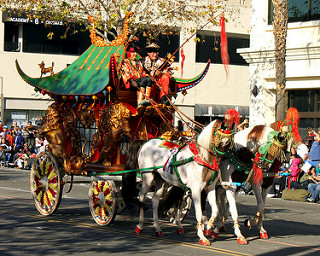

In [81]:
roses =list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[20]))

In [82]:
flowers_image_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [83]:
roses

[WindowsPath('C:/DeepLearning/Flower-Classification/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/DeepLearning/Flower-Classification/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/DeepLearning/Flower-Classification/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/DeepLearning/Flower-Classification/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/DeepLearning/Flower-Classification/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('C:/DeepLearning/Flower-Classification/datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('C:/DeepLearning/Flower-Classification/datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('C:/DeepLearning/Flower-Classification/datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('C:/DeepLearning/Flower-Classification/datasets/flower_photos/roses/118974357_0faa23cce9_

In [84]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers':3,
    'tulips': 4
}

In [85]:
img = cv2.imread(str(flowers_image_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [86]:
X, y = [],[]
for flower_name, images in flowers_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [93]:
X =  np.asarray(X)
y =  np.asarray(y)

In [94]:
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(X, y,test_size=0.3, random_state=2)

In [95]:
X_train.shape

(2569, 180, 180, 3)

In [96]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [66]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(np.array(X_train_scaled), np.array(y), verbose=0, epochs=10)

ValueError: Data cardinality is ambiguous:
  x sizes: 2569
  y sizes: 3670
Make sure all arrays contain the same number of samples.